# Notebook to do data analysis on the NLP data in the Portland Data Science Group

Importing CSV, Pandas, Ipython display to display pandas dataframes, nltk, matplotlib

In [2]:
import csv
import pandas as pd
from IPython.display import display
import nltk 
import matplotlib.pyplot as plt
import numpy as np

Read in the data as pandas dataframe

In [38]:
toxicity_annotations_unanimous_df = pd.read_table('toxicity_annotations_unanimous.tsv')
toxicity_annotations_comments_unanimous_df = pd.read_table('toxicity_annotated_comments_unanimous.tsv')
toxicity_annotations_df = pd.read_table('toxicity_annotations.tsv')
toxicity_annotations_comments_df = pd.read_table('toxicity_annotated_comments.tsv')

Merge the two tables into one by computing a median score and determining toxicity of comments

In [39]:
#Comput mean and median scores from annotations dataset
toxicity_annotations_comments_df["mean_score"] = pd.Series(toxicity_annotations_df.groupby("rev_id",as_index=False).mean()["toxicity_score"])
toxicity_annotations_comments_df["median_score"] = pd.Series(toxicity_annotations_df.groupby("rev_id",as_index=False).median()["toxicity_score"])
# create binary variable toxicity: if median score < 0, toxicity=1, otherwise 0
toxicity_annotations_comments_df["toxicity"] = (toxicity_annotations_comments_df["median_score"] < 0).astype(int)

#display (toxicity_annotations_comments_df)

Cleaning up the data and adding a few new columns to help analysis

In [40]:
#Replace "newline token" with \n
toxicity_annotations_comments_df['comment'].replace('NEWLINE_TOKEN',' ',regex=True,inplace=True)
toxicity_annotations_comments_df['comment'].replace('TAB_TOKEN',' ',regex=True,inplace=True)

#Compute comment length for each comment and store it as a table
toxicity_annotations_comments_df['comment_len'] = toxicity_annotations_comments_df['comment'].apply(len)

Plotting some basic plots about the data

toxicity hist is{'-2.0': 17710, '-1.0': 139172, '0.0': 934043, '1.0': 391721, '2.0': 11, '0.5': 228624, '-0.5': 33044, '1.5': 121, '-1.5': 12100}
comment length hist is {'-2.0': 459.8229813664596, '-1.0': 285.45882073980397, '0.0': 322.4702695700305, '1.0': 569.844345848193, '2.0': 472.0, '0.5': 503.7797344110854, '-0.5': 409.1398135818908, '1.5': 519.0, '-1.5': 241.01272727272726}


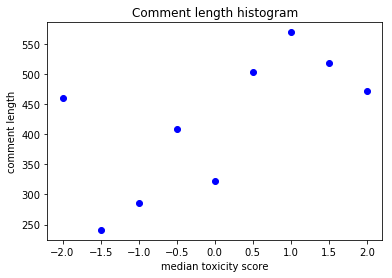

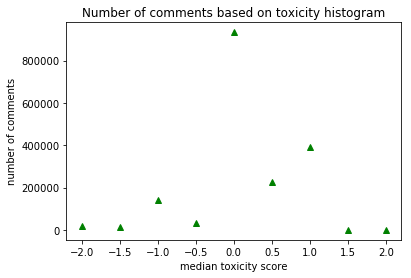

In [68]:
#group data based off rev_id and score

#intialize empty dict
for val in (set (toxicity_annotations_comments_df['median_score'])) : 
    toxicity_dict [str(val)] = toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==val].size
    comment_length_dict[str(val)] = (toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==float(val)]['comment_len']).mean()    

print ("toxicity hist is" + str(toxicity_dict))
print ("comment length hist is " + str(comment_length_dict))

#print (toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==-0.6]['comment_len'].mean())

x,y = zip(*comment_length_dict.items())
plt.plot(x,y,'bo')
plt.ylabel('comment length')
plt.xlabel('median toxicity score')
plt.title("Comment length histogram")
plt.show()

w,z = zip(*toxicity_dict.items())
plt.plot(w,z,'g^')
plt.ylabel('number of comments')
plt.xlabel('median toxicity score')
plt.title("Number of comments based on toxicity histogram")
plt.show()

#--
#toxicity hist is{'-2.0': 1610, '-1.0': 12652, '0.0': 84913, '1.0': 35611, '2.0': 1, '0.5': 20784, '-0.5': 3004, '1.5': 11, '-1.5': 1100}
#comment length hist is {'-2.0': 459.8229813664596, '-1.0': 285.45882073980397, '0.0': 322.4702695700305, '1.0': 569.844345848193, '2.0': 0, '0.5': 0, '-0.5': 0, '1.5': 0, '-1.5': 0}


In [ ]:
#Merge the two panda tables
#toxicity_annotations_combined = pd.merge(toxicity_annotations_comments_df,toxicity_annotations_df,on='rev_id')
#display (toxicity_annotations_comments_df)